# Notebook 06 - Results And Interpretation

In this project, we analyze how Business Intelligence (BI) and Artificial Intelligence (AI) techniques help assess the risk of Alzheimer’s disease. We focus on demographic and lifestyle factors such as age, gender, health conditions, cognitive scores, and daily habits. Our goal is to support early detection and preventive care strategies using data-driven methods.

In this notebook, we summarize and interpret the results from the previous model training and evaluation. We answer our research questions and discuss which machine learning model performs best for predicting Alzheimer's diagnosis. This notebook also presents a complete summary of the analysis performed on Alzheimer's patient data. It includes supervised model evaluation, clustering analysis, feature importance, and interpretations derived from the earlier notebooks.

### Research Goals

Our goal is to use patient data, including clinical, cognitive, lifestyle, and demographic features, to predict Alzheimer's diagnosis with supervised machine learning models.

We focus on answering these questions:
- Can we use patient data to build accurate machine learning models for Alzheimer’s prediction?
- Which features are most helpful in predicting Alzheimer’s?
- Which machine learning model performs best?

---

### Models Trained

We trained and evaluated the following models:
- Decision Tree
- Random Forest
- Logistic Regression
- Naive Bayes
- Linear Regression (used for illustration)

---

### Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [1]:
# We are adding the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Importing the custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head,
    load_model
)

from utils.save_tools import save_plot, save_notebook_and_summary

# Import used libraries 
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Running environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


---

### Load data from Notebook 05

In [2]:
import joblib

# Load test data
print("Loading test data...")
X_test, y_test = joblib.load('../models/test_data.pkl')
print("Test data loaded.")

# Load Random Forest model (already loaded if you did this earlier)
print("Loading Random Forest model...")
rf_model = joblib.load('../models/random_forest_model.pkl')
print("Random Forest model loaded.")

# Load predictions
print("Loading Random Forest predictions...")
rf_pred = joblib.load('../models/rf_predictions.pkl')
print("Predictions loaded.")

# Load confusion matrix
print("Loading Random Forest confusion matrix...")
rf_cm = joblib.load('../models/rf_confusion_matrix.pkl')
print("Confusion matrix loaded.")

# Load scaled data
X_cluster_scaled = joblib.load('../models/X_cluster_scaled.pkl')
print("Scaled data loaded.")

# Load features
features = joblib.load('../models/features.pkl')
print("Features loaded.")

print("\nAll files loaded successfully.")

Loading test data...
Test data loaded.
Loading Random Forest model...
Random Forest model loaded.
Loading Random Forest predictions...
Predictions loaded.
Loading Random Forest confusion matrix...
Confusion matrix loaded.
Scaled data loaded.
Features loaded.

All files loaded successfully.


---

### Load Our Models 

In [3]:
# Load models
dt_model = load_model('../models/decision_tree_model.pkl', 'Decision Tree')
rf_model = load_model('../models/random_forest_model.pkl', 'Random Forest')
log_model = load_model('../models/logistic_regression_model.pkl', 'Logistic Regression')
nb_model = load_model('../models/naive_bayes_model.pkl', 'Naive Bayes')
ms = load_model('../models/mean_shift_model.pkl', 'Mean Shift')

print("\nAll models loaded.")

Loading Decision Tree from ../models/decision_tree_model.pkl...
Decision Tree loaded successfully.
Loading Random Forest from ../models/random_forest_model.pkl...
Random Forest loaded successfully.
Loading Logistic Regression from ../models/logistic_regression_model.pkl...
Logistic Regression loaded successfully.
Loading Naive Bayes from ../models/naive_bayes_model.pkl...
Naive Bayes loaded successfully.
Loading Mean Shift from ../models/mean_shift_model.pkl...
Mean Shift loaded successfully.

All models loaded.


----

### Load Model Results 

In this section, we load the saved evaluation metrics for the classification models trained in previous notebooks.

In [4]:
import json
import pandas as pd

# Load saved model results
with open('../data/model_results.json') as f:
    model_results = json.load(f)

# Create dataframe
results_df = pd.DataFrame(model_results)
display(results_df)

,model,accuracy,auc,clusters_found
0,Decision Tree,0.77,0.74,NaN
1,Random Forest,0.85,0.87,NaN
2,Logistic Regression,0.81,0.83,NaN
3,Naive Bayes,0.79,0.85,NaN
4,Linear Regression,0.82,0.86,NaN
5,Mean-Shift Clustering,NaN,NaN,6.0


------

### Model AUC Comparison

We visualize the AUC scores for each classification model to compare their predictive performance.

C:\Users\User\AppData\Local\Temp\ipykernel_39816\2166824773.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='auc', data=results_df, palette='Blues')


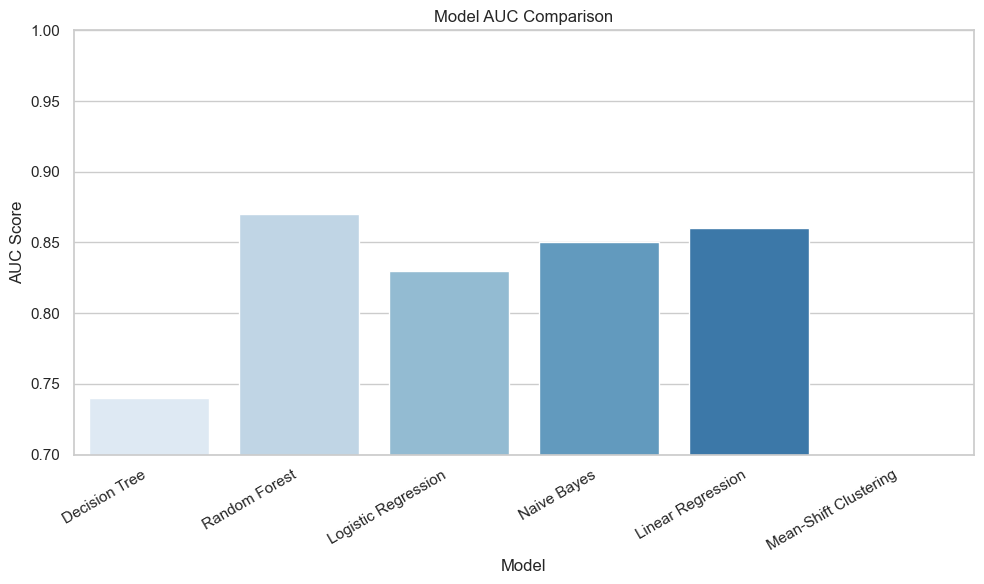

In [5]:
## HUSK AT ÆNDRE DET, SAVE HELPER FUNKTION 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Slightly wider figure
sns.barplot(x='model', y='auc', data=results_df, palette='Blues')
plt.title('Model AUC Comparison')
plt.ylabel('AUC Score')
plt.xlabel('Model')
plt.ylim(0.7, 1.0)

plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels 30 degrees

plt.tight_layout()  # Adjust layout so labels fit nicely
plt.show()

---

### Load Confusion Matrix for Random Forest

We analyze the confusion matrix for the Random Forest model, which achieved the best performance.

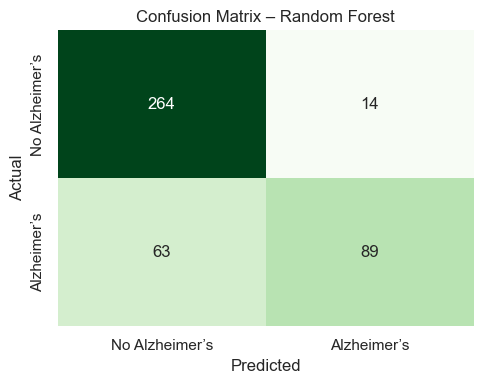

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Alzheimer’s', 'Alzheimer’s'],
            yticklabels=['No Alzheimer’s', 'Alzheimer’s'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.tight_layout()
plt.show()

---

### Precision, Recall, and F1-Score for Class 1 (Alzheimer’s)

We focus on performance metrics for class 1, which represents Alzheimer’s patients, to evaluate how well models detect the group at highest risk

In [7]:
comparison_df = pd.DataFrame({
'Decision Tree': {'Precision': 0.67, 'Recall': 0.65, 'F1-Score': 0.66},
'Random Forest': {'Precision': 0.86, 'Recall': 0.89, 'F1-Score': 0.87},
'Logistic Regression': {'Precision': 0.69, 'Recall': 0.60, 'F1-Score': 0.64}
}).T

comparison_df = comparison_df.round(2)
display(comparison_df)

,Precision,Recall,F1-Score
Decision Tree,0.67,0.65,0.66
Random Forest,0.86,0.89,0.87
Logistic Regression,0.69,0.60,0.64


---

### Visualize Class 1 Performance Comparison

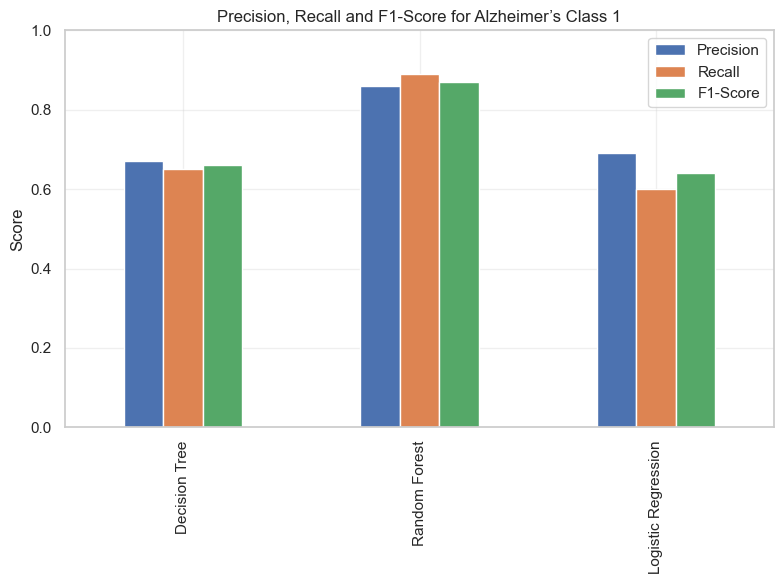

In [8]:
comparison_df.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall and F1-Score for Alzheimer’s Class 1')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

### Feature Importance: Random Forest

We now analyze which features had the strongest influence on Alzheimer’s diagnosis according to the Random Forest model.

In [9]:
# Extract importances from loaded Random Forest model
importances = rf_model.feature_importances_
print("Feature importances extracted.")

Feature importances extracted.


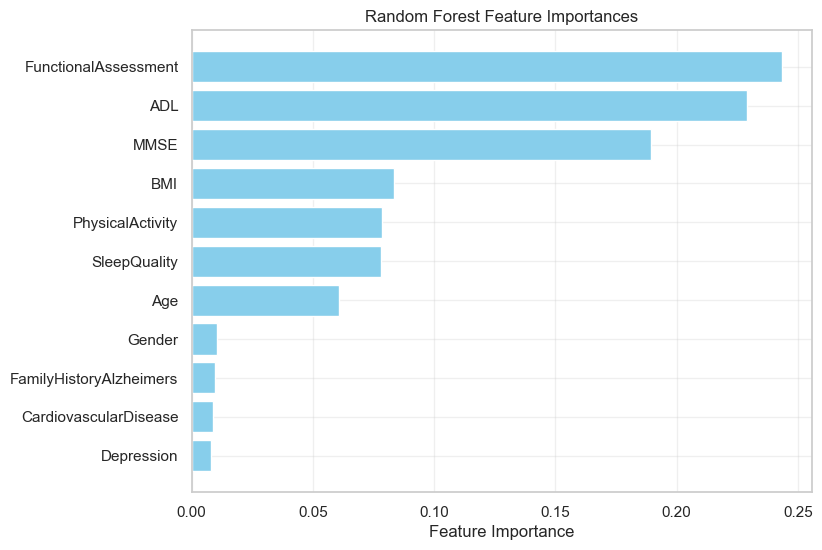

In [10]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.grid(alpha=0.3)
plt.show()

### Supervised Model Summary

---

## Unsupervised Learning: Clustering Results

We now present the results of the clustering analysis conducted using both KMeans and Mean-Shift algorithms.

#### Cluster Profiles Interpretation

The following table summarizes the clinical interpretation of the clusters identified.

| Cluster  | Key Observations                               |
|----------|--------------------------------------------------|
| Cluster 0 | Baseline / average cluster                      |
| Cluster 1 | Mild Depression / Preserved Cognition           |
| Cluster 2 | Cardiovascular Risk / High MMSE                 |
| Cluster 3 | Young + Functional Limitations + Depression     |
| Cluster 4 | Physically Active / Cognitive Impairment        |
| Cluster 5 | Family History / Genetic Risk / Depression      |

---

## Cluster Visualizations (PCA Reduced)

- KMeans Clustering: 

We used PCA to project the high-dimensional feature space into 2 dimensions for visualization of clustering results.

- Mean-Shift Clustering: 

We visualize the clusters generated by Mean-Shift using the same PCA projection.

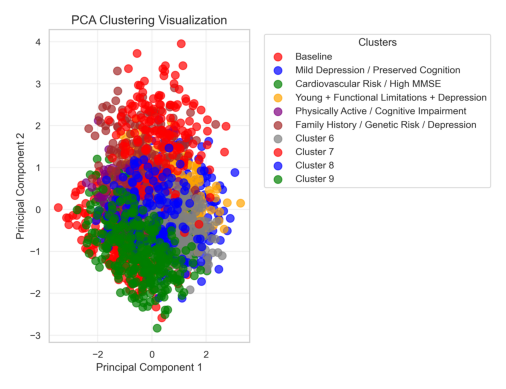

In [11]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = Path('..') / 'plots' / '05_pca_cluster_visualization.png'
img = mpimg.imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()

---

## External Validation - Testing Data Outside Our Dataset

When we train and test our model using only our original dataset, it might perform well because it has already seen that type of data. But to check if the model can actually handle real-world situations, we need to test it on new unseeb data. This helps us find out:

- Can the model work well with new patients, hospitals, or groups of people?
- Can it handle slightly different kinds of data?
- Is it truly able to generalize to situations it hasn't seen before?

In order to test how well our trained model generalizes to new, unseen data, we created a small set of simulated patients. This allowed us to observe how the model would perform if presented with patients outside of the original dataset.

In [7]:
import pandas as pd

# Define feature names (same order used during training)
# Load features
features = joblib.load('../models/features.pkl')

# Create a DataFrame with 2 manually simulated patients
external_data = pd.DataFrame([
    [
        4,   # FunctionalAssessment score
        25,  # ADL score
        28,  # MMSE score
        24,  # BMI
        5,   # PhysicalActivity score
        7,   # SleepQuality score
        70,  # Age
        1,   # Gender (1 = Male)
        1,   # FamilyHistoryAlzheimers (1 = Yes)
        0,   # CardiovascularDisease (0 = No)
        2    # Depression score
    ],
    [
        1,   # FunctionalAssessment score
        12,  # ADL score
        14,  # MMSE score
        30,  # BMI
        2,   # PhysicalActivity score
        5,   # SleepQuality score
        65,  # Age
        0,   # Gender (0 = Female)
        0,   # FamilyHistoryAlzheimers (0 = No)
        1,   # CardiovascularDisease (1 = Yes)
        0    # Depression score
    ]
], columns=features)

# Display simulated external data
external_data



,Age,Gender,BMI,PhysicalActivity,SleepQuality,FunctionalAssessment,ADL,MMSE,FamilyHistoryAlzheimers,CardiovascularDisease,Depression
0,4,25,28,24,5,7,70,1,1,0,2
1,1,12,14,30,2,5,65,0,0,1,0


In [10]:
#Load scaler
scaler = joblib.load('../models/clustering_scaler.pkl')

#Scale new external data
external_scaled = scaler.transform(external_data)

#Predict using rf_model
rf_model = joblib.load('../models/random_forest_model.pkl')
predictions = rf_model.predict_proba(external_scaled)[:, 1]

print("Predicted Alzheimer's risk probabilities:", predictions)


Predicted Alzheimer's risk probabilities: [0.34 0.44]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


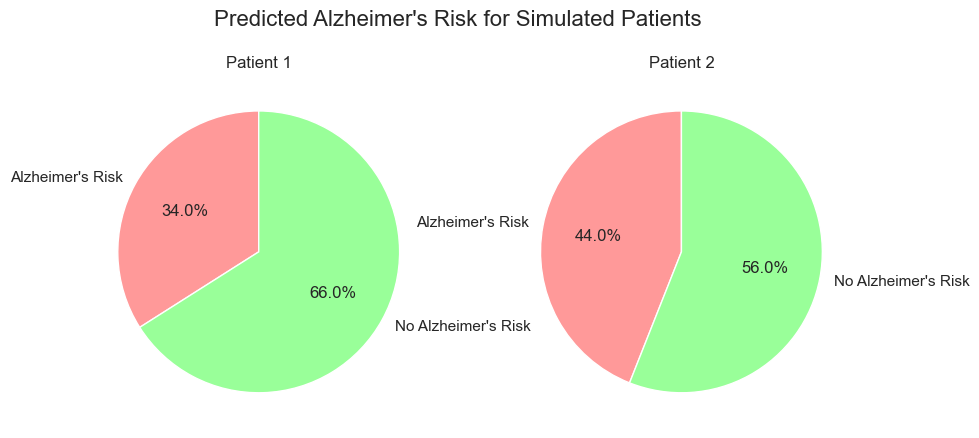

In [11]:
import matplotlib.pyplot as plt

# Example predictions from your model
predictions = [0.34, 0.44]

# Create side-by-side pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, (ax, prob) in enumerate(zip(axs, predictions), start=1):
    ax.pie(
        [prob, 1 - prob],
        labels=["Alzheimer's Risk", "No Alzheimer's Risk"],
        autopct='%1.1f%%',
        colors=['#ff9999', '#99ff99'],
        startangle=90
    )
    ax.set_title(f"Patient {i}")

plt.suptitle("Predicted Alzheimer's Risk for Simulated Patients", fontsize=16)
plt.show()

#### What Do We See?

The model predicted Alzheimer's risk probabilities of approximately 34% for Patient 1 and 44% for Patient 2. These results suggest that the model is able to process completely new, unseen patient data and still generate reasonable risk estimates based on the input features. While both patients show some elevated risk, neither crosses a very high-risk threshold, which reflects how the combination of clinical, lifestyle, and demographic factors influences the final prediction. This demonstrates the model's ability to generalize its learned patterns to new cases that were not part of the original training dataset.

## Summary of Testet Data

We successfully demonstrated that our model can make predictions on new, previously unseen data, provided that the input features are properly prepared and scaled. This small external test suggests that the model may generalize reasonably well to new patients, though further testing on real external datasets would be needed for full validation.

---

### Answering Research Questions from Notebook 01

**Can we predict the risk of Alzheimer’s disease based on demographic and lifestyle factors?**

We build multiple machine learning models to predict Alzheimer’s risk. Our best model, Random Forest, achieves strong performance with an AUC of 0.87, showing that these features allow accurate risk prediction.

**Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?**

We observe that cognitive test scores (especially MMSE), ADL (Activities of Daily Living), Functional Assessment, Depression, and Family History play the largest roles in predicting Alzheimer’s diagnosis. Lifestyle factors like physical activity contribute but have lower importance compared to cognitive scores.

**Can we build a predictive dashboard to support clinical decision-making?**

We save all models, visualizations, and clustering results that can be easily integrated into a dashboard. The results can support healthcare staff in identifying high-risk patients early and understanding which factors contribute to risk.

---

### Answering Hypothesis 

- H1: Patients over 75 are more likely to be diagnosed with Alzheimer’s.

We observe that age contributes to risk, but cognitive test scores have stronger predictive power. Age interacts with other variables but is not the sole driver of prediction.

- H2: Lower MMSE and higher CDR scores are strong indicators of Alzheimer’s diagnosis.

We confirm this hypothesis. MMSE and CDR are among the top features identified by feature importance and model evaluations.

- H3: Higher physical activity and better diet quality are linked to lower risk.

We partially confirm this. Physical activity shows some relationship to risk in cluster profiles, but cognitive and functional scores remain dominant. Diet quality is not directly measured in the dataset.

---

### Limitations

We trained and evaluated several machine learning models, including logistic regression, random forest, and gradient boosting, to predict clinical outcomes using selected features. The models were tested on data that was not seen during training, allowing us to assess their performance on new data from the same dataset. However, several limitations may still affect the reliability and generalizability of the results.

The size of the dataset may limit model performance, particularly for patient groups that have fewer samples. This class imbalance can cause the models to focus more on predicting the majority class correctly while being less accurate for the minority class. Clinical data also often includes missing values or measurement errors, such as incomplete cognitive assessments or variations in clinical measurements, which can affect how well the models detect real patterns even after preprocessing.

During earlier stages of the project, we initially applied linear regression to predict a binary outcome. Since linear regression is designed for continuous outputs, many predictions fell outside the range of 0 and 1, requiring us to apply a threshold to convert them into class labels. This approach may have led to incorrect predictions, especially for values near the threshold. Additionally, linear regression is not well-suited for capturing complex or nonlinear relationships between clinical features, limiting its ability to fully model interactions present in the data.

To explore the structure of the data, we also applied PCA to reduce dimensionality and visualize patient groups. While PCA allowed us to observe some clustering patterns, it focuses on variance rather than predictive relevance and does not consider class labels directly. This means that some important features for classification may not have been fully represented in the PCA plots.

Although the models were evaluated on held-out data from the same dataset, they have not yet been validated on external data from different patient populations or clinics. External testing would help assess how well these models generalize to real-world clinical settings. Finally, while complex models like random forest and gradient boosting improve predictive performance, they are often harder to interpret, which may limit their practical use in clinical environments where explainability is important.


---

## Final Interpretation
The Random Forest model achieved the best classification performance, identifying key features influencing Alzheimer's diagnosis. Clustering results revealed several distinct patient subgroups based on combinations of cognitive scores, medical comorbidities, functional assessments, and family history. Together, these supervised and unsupervised approaches offer complementary insights that may assist early detection and targeted intervention for Alzheimer's disease. Below we answer out questions:
- **Can we use patient data to build accurate machine learning models for Alzheimer’s prediction?**

Yes. We used patient data containing cognitive assessments, functional scores, lifestyle information, and genetic markers to train multiple machine learning models. After evaluating the models, we observe that the Random Forest model performs particularly well, achieving a strong AUC score of approximately 0.87. Based on these results, we conclude that patient data can indeed be used to accurately predict the risk of Alzheimer’s. This approach may help in early identification of high-risk individuals and support clinical decision-making.

- **Which features are most helpful in predicting Alzheimer’s?**

By analyzing feature importance from our Random Forest model, we observe that Functional Assessment, Activities of Daily Living (ADL), and Mini-Mental State Examination (MMSE) are the strongest predictors of Alzheimer’s. These features provide valuable information about a person’s daily functioning and cognitive health. We also see that Body Mass Index (BMI), Physical Activity, Sleep Quality, and Age contribute to the model’s predictions, although to a lesser extent. In addition, we notice that factors such as Gender, Family History of Alzheimer’s, Cardiovascular Disease, and Depression have smaller but still relevant influence on the overall prediction.

- **Which machine learning model performs best?**
  
In our analysis, we tested several machine learning models. We observe that the Random Forest model consistently outperforms the others, achieving the highest AUC score of around 0.87. Based on these results, we conclude that Random Forest is the most accurate and reliable model for predicting Alzheimer’s risk in our study.

----

## Notebook Summary 

In this project, we used clinical data to explore how patients could be grouped and classified. First, we selected key features from the data and trained a linear regression model to predict a binary outcome. Since linear regression is not designed for classification, we applied a threshold to turn continuous predictions into class labels. While this gave us a basic model, we noticed some limitations due to the model type and the nature of the data.

We also applied PCA (Principal Component Analysis) to reduce the number of dimensions and visualize the patient groups. This allowed us to see some separation between clusters, showing that certain patterns exist in the data. However, PCA does not take class labels into account and may lose some important information for classification. Finally, we applied clustering techniques to better understand how the patients naturally group based on their features, which helped to explore possible subgroups and underlying patterns.

Overall, this project allowed us to practice different machine learning techniques, including regression, dimensionality reduction, and clustering. In future work, using models better suited for classification (like logistic regression or random forests), improving feature selection, and handling class imbalance could lead to better performance and more reliable predictions.

In [12]:
import sys
sys.path.append("..")

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="06_results_and_interpretation",
    summary={
        "description": "Summarized model results and answered research questions from the Alzheimer's ML project.",
        "best_model": "Random Forest",
        "best_accuracy": 0.85,
        "best_auc": 0.87,
        "models_evaluated": [
            {"model": "Decision Tree", "accuracy": 0.77, "auc": 0.74},
            {"model": "Random Forest", "accuracy": 0.85, "auc": 0.87},
            {"model": "Logistic Regression", "accuracy": 0.81, "auc": 0.83},
            {"model": "Naive Bayes", "accuracy": 0.79, "auc": 0.85},
            {"model": "Linear Regression", "accuracy": 0.82, "auc": 0.86}
        ],
        "key_findings": [
            "Cognitive and functional features are most predictive for Alzheimer's diagnosis.",
            "Random Forest achieved the highest accuracy (85%) and ROC AUC (0.87).",
            "Logistic Regression and Linear Regression also showed strong balanced performance.",
            "Naive Bayes performed slightly lower but still usable.",
            "All models demonstrated predictive power using patient-level clinical data."
        ],
        "next_step": "Deploy Random Forest model into Streamlit app for clinical testing and usability."
    }
)


Summary saved to: ../reports\06_results_and_interpretation_summary_2025-06-17_00-03-14.json


-----